### Phân tích cú pháp: Bài thực hành trên lớp

Bài 2: chương trình minh hoạ kiểm lỗi cú pháp tiếng Anh đơn giản

1) Cài đặt thư viện liên quan
    
    - Cài đặt thư viện Stanford NLPCore
    
    Yêu cầu có cài đặt Java SDK vì bộ thư viện Stanford NLPCore code Java, file chạy .jar

    - import bộ phân tích cú pháp CoreNLPParser

2)  Phân tích cú pháp cho câu và khảo sát  cây cú pháp

a) gọi phân tích cú pháp

b) view cây

3) Qui tắc kiểm lỗi cú pháp

-	Ví dụ về Qui tắc agreement giữa Subject – Verb

-	Kiểm lỗi và đưa ra loại lỗi



In [1]:
!pip install wget
#download CoreNLP 4.5.5
import wget
wget.download( 'https://nlp.stanford.edu/software/stanford-corenlp-4.5.5.zip')
!ps -o pid,cmd | grep java

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c56ce7e8844f0ccec769a6eee2d10ddf5ca2ba53fbc9c591ca9decce0a393229
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   2067 /bin/bash -c ps -o pid,cmd | grep java
   2069 grep java


In [2]:
!sudo mkdir -p /usr/java/oracle
%cd /usr/java/oracle
!wget --no-check-certificate -c --header "Cookie: oraclelicense=accept-securebackup-cookie" https://download.oracle.com/java/17/latest/jdk-17_linux-x64_bin.tar.gz
!sudo tar -xvf jdk-17_linux-x64_bin.tar.gz

/usr/java/oracle
--2023-09-27 16:05:17--  https://download.oracle.com/java/17/latest/jdk-17_linux-x64_bin.tar.gz
Resolving download.oracle.com (download.oracle.com)... 23.203.244.87
Connecting to download.oracle.com (download.oracle.com)|23.203.244.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182376116 (174M) [application/x-gzip]
Saving to: ‘jdk-17_linux-x64_bin.tar.gz’

jdk-17_linux-x64_bi 100%[===================>] 173.93M   192MB/s    in 0.9s    

2023-09-27 16:05:18 (192 MB/s) - ‘jdk-17_linux-x64_bin.tar.gz’ saved [182376116/182376116]

jdk-17.0.8/LICENSE
jdk-17.0.8/README
jdk-17.0.8/bin/jar
jdk-17.0.8/bin/jarsigner
jdk-17.0.8/bin/java
jdk-17.0.8/bin/javac
jdk-17.0.8/bin/javadoc
jdk-17.0.8/bin/javap
jdk-17.0.8/bin/jcmd
jdk-17.0.8/bin/jconsole
jdk-17.0.8/bin/jdb
jdk-17.0.8/bin/jdeprscan
jdk-17.0.8/bin/jdeps
jdk-17.0.8/bin/jfr
jdk-17.0.8/bin/jhsdb
jdk-17.0.8/bin/jimage
jdk-17.0.8/bin/jinfo
jdk-17.0.8/bin/jlink
jdk-17.0.8/bin/jmap
jdk-17.0.8/bin/jmod
jd

In [3]:
!sudo echo "JAVA_HOME=/usr/java/oracle/jdk-17.0.8" >> /etc/profile
!sudo echo "PATH=$PATH:$HOME/bin:$JAVA_HOME/bin" >> /etc/profile
!sudo echo "export JAVA_HOME" >> /etc/profile
!sudo echo "export PATH" >> /etc/profile
!sudo cat /etc/profile

# /etc/profile: system-wide .profile file for the Bourne shell (sh(1))
# and Bourne compatible shells (bash(1), ksh(1), ash(1), ...).

if [ "${PS1-}" ]; then
  if [ "${BASH-}" ] && [ "$BASH" != "/bin/sh" ]; then
    # The file bash.bashrc already sets the default PS1.
    # PS1='\h:\w\$ '
    if [ -f /etc/bash.bashrc ]; then
      . /etc/bash.bashrc
    fi
  else
    if [ "$(id -u)" -eq 0 ]; then
      PS1='# '
    else
      PS1='$ '
    fi
  fi
fi

if [ -d /etc/profile.d ]; then
  for i in /etc/profile.d/*.sh; do
    if [ -r $i ]; then
      . $i
    fi
  done
  unset i
fi
JAVA_HOME=/usr/java/oracle/jdk-17.0.8
PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/root/bin:/bin
export JAVA_HOME
export PATH


In [4]:
!. /etc/profile && java --version

openjdk 11.0.20.1 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [5]:
# Cài đặt java JDK nếu chưa có (https://www.oracle.com/java/technologies/javase-downloads.html)

#Thêm biến môi trường
import os
java_path = "/usr/java/oracle/jdk-17.0.8/bin/java" #replace directory by your directory
os.environ['JAVAHOME'] = java_path

import nltk
nltk.internals.config_java(java_path) #replace directory by your directory

In [6]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk
from ctypes.util import find_library
print(find_library("gs")) #will display libgs.so.9 if installed; will print None if not
!excalibur initdb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [7]:
%cd /content
! ls /content
! apt-get install unzip
! unzip /content/stanford-corenlp-4.5.5.zip
! ls /content/stanford-corenlp-4.5.5.zip

/content
sample_data  stanford-corenlp-4.5.5.zip
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Archive:  /content/stanford-corenlp-4.5.5.zip
   creating: stanford-corenlp-4.5.5/
  inflating: stanford-corenlp-4.5.5/javax.activation-api-1.2.0.jar  
  inflating: stanford-corenlp-4.5.5/Makefile  
   creating: stanford-corenlp-4.5.5/sutime/
  inflating: stanford-corenlp-4.5.5/sutime/spanish.sutime.txt  
  inflating: stanford-corenlp-4.5.5/sutime/english.holidays.sutime.txt  
  inflating: stanford-corenlp-4.5.5/sutime/defs.sutime.txt  
  inflating: stanford-corenlp-4.5.5/sutime/english.sutime.txt  
  inflating: stanford-corenlp-4.5.5/sutime/british.sutime.txt  
  inflating: stanford-corenlp-4.5.5/joda-time.jar  
  inflating: stanford-corenlp-4.5.5/RESOURCE-LICENSES  
  inflating: stanford-corenlp-4.5.5/jaxb-api-2.4.0-b180830

In [8]:
import os

#Set up môi trường cho corenlp  đường dẫn bên dưới đến thư mục "stanford-corenlp-4.2.0"
from nltk.parse.corenlp import CoreNLPServer
STANFORD = os.path.join("/content", "stanford-corenlp-4.5.5")
print(STANFORD)
#  Giải nén và loadmodel
model = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.5.5.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.5.5-models.jar"),
   verbose=True,
   port=9001
)
# Start the model CoreNLPServer
#model.start() not support on 4.2.0

/content/stanford-corenlp-4.5.5


In [9]:
%cd /content/stanford-corenlp-4.5.5
!nohup java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 15000 > core-server.log&


/content/stanford-corenlp-4.5.5
nohup: redirecting stderr to stdout


In [10]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))
                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 



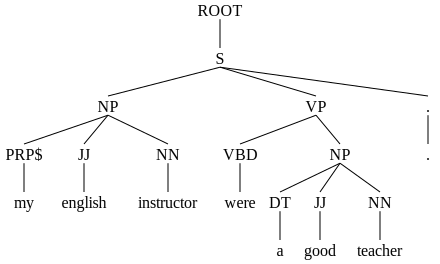

In [33]:
import matplotlib
matplotlib.use('Agg')

def parse_processing(string):
    #Tạo parse tree
    parser = CoreNLPParser(url='http://localhost:9001')
    parse = next(parser.raw_parse(string))

    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse),
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    return tree

string = "My English Instructor were a good teacher."
tree = parse_processing(string)
print(tree)
tree.pretty_print()
tree

In [23]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


In [13]:
# phân tích dependency parsing
from nltk.parse.corenlp import CoreNLPDependencyParser

In [34]:
#string = 'I put the book in the box on the table.'
string = 'I have booked a very nice hotel.'
parser = CoreNLPDependencyParser(url='http://localhost:9001')
parse = next(parser.raw_parse(string))

In [17]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


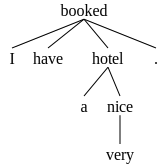

In [35]:
parse.tree()

In [36]:
#sent = 'she love a teacher very much '
#sent = 'actually her friend loves the teacher very much '
#sent = 'she loves'
#sent = 'actually she loves the teacher very much '
#sent = 'she want to teach this lecture'
sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
print(len(tree[0]))
tree.pretty_print()

2
    ROOT        
     |           
     S          
  ___|____       
 |        VP    
 |    ____|___   
 NP  |        NP
 |   |        |  
PRP VBP      PRP
 |   |        |  
 i  love     you



In [25]:

def getNP_VP(tree):
    for i in range(len(tree[0])-1):
        if tree[0][i].label()=='NP' and tree[0][i+1].label()=='VP':
            return tree[0][i], tree[0][i+1]
    return 0,0


In [26]:
NP,VP = getNP_VP(tree)
NP.pretty_print()
VP.pretty_print()

        NP             
  ______|________       
PRP$    JJ       NN    
 |      |        |      
 my  english instructor

          VP             
  ________|___            
 |            NP         
 |     _______|______     
VBD   DT      JJ     NN  
 |    |       |      |    
were  a      good teacher



In [27]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you
4:  Ngôi thứ 3 số ít: he, she, it
5:   Ngôi thứ 3 số nhiều: they
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''

def get_subject_type(node):
    words = node.leaves()
    if 'i' in words:
        return 1
    elif 'we' in words:
        return 2
    elif 'you' in words:
        return 3
    elif len(set(words).intersection(['he','she','it']))>0:
        return 4
    elif 'they' in words:
        return 5
    else:
        return -1

print(get_subject_type(NP))

-1


In [28]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''
vdict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}
def get_verb_type(node):
    for sub in node.subtrees():
        k = sub.label()
        if k in vdict.keys():
            return vdict[k]
    return -1

In [29]:
VP.pretty_print()
get_verb_type(VP)

          VP             
  ________|___            
 |            NP         
 |     _______|______     
VBD   DT      JJ     NN  
 |    |       |      |    
were  a      good teacher



4

In [30]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
match={1:[2],4:[3]}
def check_grammar(sent):
    tree = parse(sent)
    NP,VP = getNP_VP(tree)
    n = get_subject_type(NP)
    v = get_verb_type(VP)
    if n in match.keys():
        if not v in match[n]:
            return 'error'
    return 'ok'

In [37]:
#sent = 'she want to go to school'
sent = 'she wants to go to school'
check_grammar(sent)

'ok'